In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,6)

In [2]:
big_df = pd.read_csv("../classify-figures/classifications/try3.csv")
big_df = big_df[big_df["status"]=="SUCCESS"]

# Figure extraction

In [16]:
figure_extraction_df = pd.read_csv("figure_extraction_testtable.csv")
pdfs_correct = (figure_extraction_df["correct"]==True).mean()
figures_correct = figure_extraction_df["found"].sum()/(figure_extraction_df["found"].sum() + figure_extraction_df["not-found"].sum())

print(f"Sample size: {len(figure_extraction_df)} papers, {(figure_extraction_df['found'].sum() + figure_extraction_df['not-found'].sum())} Figures")
print(f"Figures extracted: {figures_correct*100:.2f}%, {(figure_extraction_df['not-found'].sum())} figures not found.")

Sample size: 17 papers, 96 Figures
Figures extracted: 91.67%, 8 figures not found.


# Mention extraction

In [28]:
mention_extraction_df = pd.read_csv("mention_extraction_testtable.csv")
pages_correct = (mention_extraction_df["correct_page"]==True).mean()
headings_correct = (mention_extraction_df["correct_heading"]==True).mean()
headings_empty = (mention_extraction_df["mention_heading"].isna()).mean()

mention_extraction_df["doi"] = mention_extraction_df.apply(lambda row: "-".join(row.pdf_path.split("/")[-1].split("-")[:2]), axis=1)

print(f"Sample size: {mention_extraction_df['doi'].nunique()} papers, {len(mention_extraction_df)} Figures")
print(f"Mention page correctly extracted: {pages_correct*100:.2f}%")
print(f"Mention heading correctly extracted: {headings_correct*100:.2f}%")
print(f"No mention heading found: {headings_empty*100:.2f}%")
print(f"Mention heading incorrect: {100 - (headings_correct+headings_empty)*100:.2f}%")


Sample size: 47 papers, 50 Figures
Mention page correctly extracted: 96.00%
Mention heading correctly extracted: 68.00%
No mention heading found: 20.00%
Mention heading incorrect: 12.00%


# Classification

In [5]:
classification_df = pd.read_csv("classification_testtable.csv")

In [6]:
classification_df["doi"] = classification_df.apply(lambda row: "-".join(row.path.split("/")[-1].split("-")[:2]), axis=1)
print(f"Sample size: {len(classification_df)} visualisations from {classification_df['doi'].nunique()} papers.")

Sample size: 215 visualisations from 187 papers.


Visualisations completely correct: 87.44%


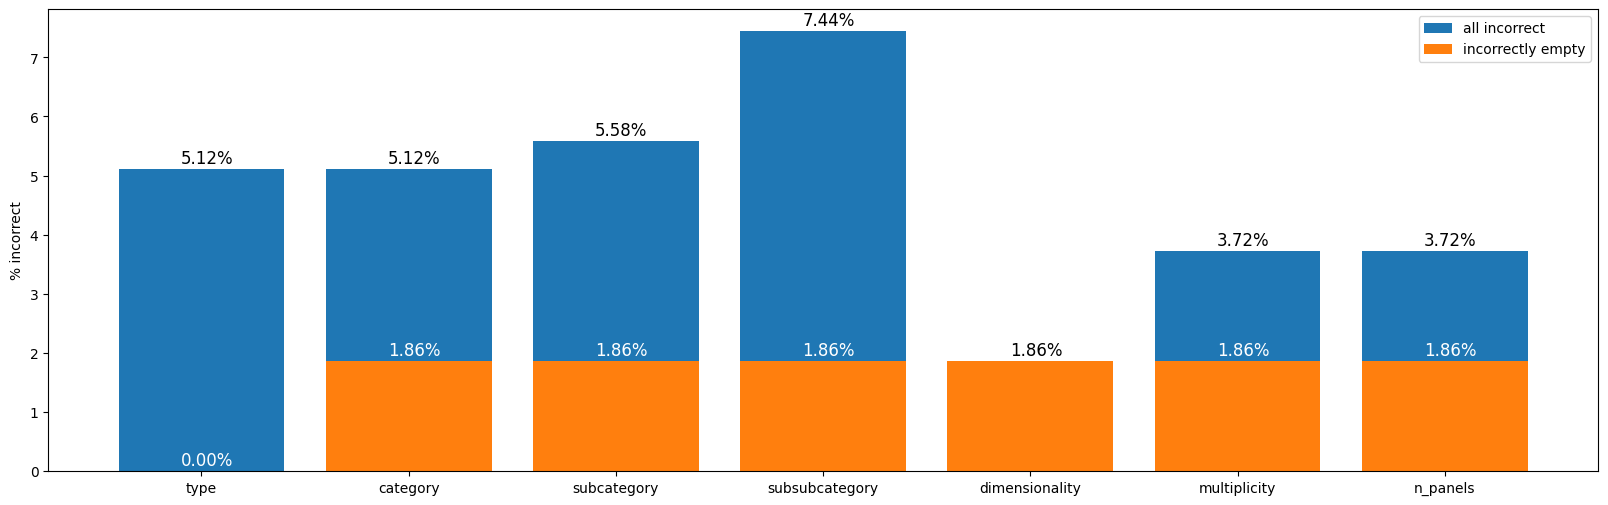

In [7]:
incorrect_df = classification_df[
    classification_df["type correct"].notna() |
    classification_df["category correct"].notna() |
    classification_df["subcategory correct"].notna() |
    classification_df["subsubcategory correct"].notna() |
    classification_df["dimensionality correct"].notna() |
    classification_df["multiplicity correct"].notna() |
    classification_df["n_panels correct"].notna()
]
print(f"Visualisations completely correct: {(len(classification_df)-len(incorrect_df))/len(classification_df)*100:.2f}%")

checks = ["type", "category", "subcategory", "subsubcategory", "dimensionality", "multiplicity", "n_panels"]
incorrect_perc = []
empty_perc = []
for c in checks:
    incorrect_perc.append(len(classification_df[f"{c} correct"].dropna())/len(classification_df) * 100)
    empty_perc.append(len(classification_df[pd.isna(classification_df[f"{c}"]) & pd.notna(classification_df[f"{c} correct"])])/len(classification_df) * 100)

incorrect_bars = plt.bar(checks, incorrect_perc, label="all incorrect")
empty_bars = plt.bar(checks, empty_perc, label="incorrectly empty")

count = 0
for bar in empty_bars:
    plt.text(bar.get_x()+0.3, bar.get_height()+.1, f"{empty_perc[count]:.2f}%", size=12, color="white")
    count += 1
count = 0
for bar in incorrect_bars:
    plt.text(bar.get_x()+0.3, bar.get_height()+.1, f"{incorrect_perc[count]:.2f}%", size=12)
    count += 1

plt.ylabel("% incorrect")
plt.legend()
plt.show()

In [8]:
type_incorrect = classification_df["type correct"].dropna()
D_incorrect = type_incorrect[type_incorrect == "D"]
P_incorrect = type_incorrect[type_incorrect == "P"]
print(f"Figures type incorrect: {len(type_incorrect)/len(classification_df)*100}%")
print(f"Should have been D: {len(D_incorrect)/len(type_incorrect)*100}% of type incorrect.")
print(f"Should have been P: {len(P_incorrect)/len(type_incorrect)*100}% of type incorrect.")

Figures type incorrect: 5.116279069767442%
Should have been D: 36.36363636363637% of type incorrect.
Should have been P: 63.63636363636363% of type incorrect.


In [9]:
type_correct = classification_df[pd.isna(classification_df["type correct"])]
type_correct_other_incorrect = type_correct[
    type_correct["category correct"].notna() |
    type_correct["subcategory correct"].notna() |
    type_correct["subsubcategory correct"].notna() |
    type_correct["dimensionality correct"].notna() |
    type_correct["multiplicity correct"].notna() |
    type_correct["n_panels correct"].notna()
]

print(f"Visualisations categorisation (excluding type) completely correct: {100 - len(type_correct_other_incorrect)/len(classification_df)*100}%")


Visualisations categorisation (excluding type) completely correct: 92.55813953488372%


In [13]:
category_incorrect = type_correct_other_incorrect[type_correct_other_incorrect["category correct"].notna()]
print(f"Category incorrect: {100 - len(category_incorrect)/len(classification_df)*100}%")
category_correct = type_correct_other_incorrect[type_correct_other_incorrect["category correct"].isna()]
subcategory_incorrect = category_correct[category_correct["subcategory correct"].notna()]
print(f"Subcategory incorrect: {100 - len(subcategory_incorrect)/len(classification_df)*100}%")
subcategory_correct = category_correct[category_correct["subcategory correct"].notna()]
subsubcategory_incorrect = subcategory_correct[subcategory_correct["subsubcategory correct"].notna()]
print(f"Subsubcategory incorrect: {100 - len(subsubcategory_incorrect)/len(classification_df)*100}%")


Category incorrect: 96.74418604651163%
Subcategory incorrect: 99.53488372093024%
Subsubcategory incorrect: 99.53488372093024%


In [15]:
dimensionality_incorrect = type_correct_other_incorrect[type_correct_other_incorrect["dimensionality correct"].notna()]
print(f"Dimensionality incorrect: {100 - len(dimensionality_incorrect)/len(classification_df)*100}%")
multiplicity_incorrect = type_correct_other_incorrect[type_correct_other_incorrect["multiplicity correct"].notna()]
print(f"Multiplicity incorrect: {100 - len(multiplicity_incorrect)/len(classification_df)*100}%")
multiplicity_correct_multipanel = type_correct_other_incorrect[(type_correct_other_incorrect["multiplicity correct"].isna()) & (type_correct_other_incorrect["multiplicity"] == "Multipanel")]
n_panels_incorrect = multiplicity_correct_multipanel[multiplicity_correct_multipanel["n_panels"].notna()]
print(f"n_panels incorrect: {100 - len(n_panels_incorrect)/len(multiplicity_correct_multipanel)*100}%")



Category incorrect: 100.0%
Multiplicity incorrect: 98.13953488372093%
n_panels incorrect: 0.0%


## Invalid

In [3]:
classification_df = pd.read_csv("../classify-figures/classifications/try3.csv", index_col=0)

In [5]:
not_success_n = len(classification_df[classification_df["status"] != "SUCCESS"])
print(f"Not successfully categorised: {not_success_n} Figures ({not_success_n/len(classification_df)*100:.2f}%)")

Not successfully categorised: 261 Figures (3.25%)
